# I. Class distribution, average image per class, top 10 classes have the most and the least image.

In [34]:
from collections import Counter
import os

data_dir = "/kaggle/input/anime-character-classification-2/moeimouto-faces"

class_counts = {}
for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
        class_counts[cls] = count

sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

print("Total classes:", len(sorted_counts))
print("Total images:", sum(c for _, c in sorted_counts))
print("Average images per class:", sum(c for _, c in sorted_counts)//len(sorted_counts))

print("\nTop 10 classes by image count:")
for cls, count in sorted_counts[:10]:
    print(f"{cls}: {count}")

print("\nBottom 10 classes by image count:")
for cls, count in sorted_counts[-10:]:
    print(f"{cls}: {count}")


Total classes: 173
Total images: 14397
Average images per class: 83

Top 10 classes by image count:
037_lala_satalin_deviluke: 161
053_kousaka_tamaki: 161
042_tsukimura_mayu: 151
059_sairenji_haruna: 149
073_subaru_nakajima: 146
001_kinomoto_sakura: 141
064_amami_haruka: 135
068_miyamura_miyako: 135
112_hinamori_amu: 134
072_melon-chan: 130

Bottom 10 classes by image count:
997_ana_coppola: 44
171_ikari_shinji: 43
186_nanael: 41
175_saotome_alto: 40
078_black_rock_shooter: 40
181_allen_walker: 39
998_ito_nobue: 38
188_aika_granzchesta: 37
134_nunnally_lamperouge: 37
084_okazaki_tomoya: 32


- This is a moderately imbalanced dataset, which is common in character classification datasets.
- Some classes have almost 5× more images than the smallest classes, so class imbalance is significant.
  
=> Could use some method to balance the class like Horizontal/vertical flips, Rotation, scaling, cropping, Affine transforms, perspective changes...

# II Mean, median, std deviation

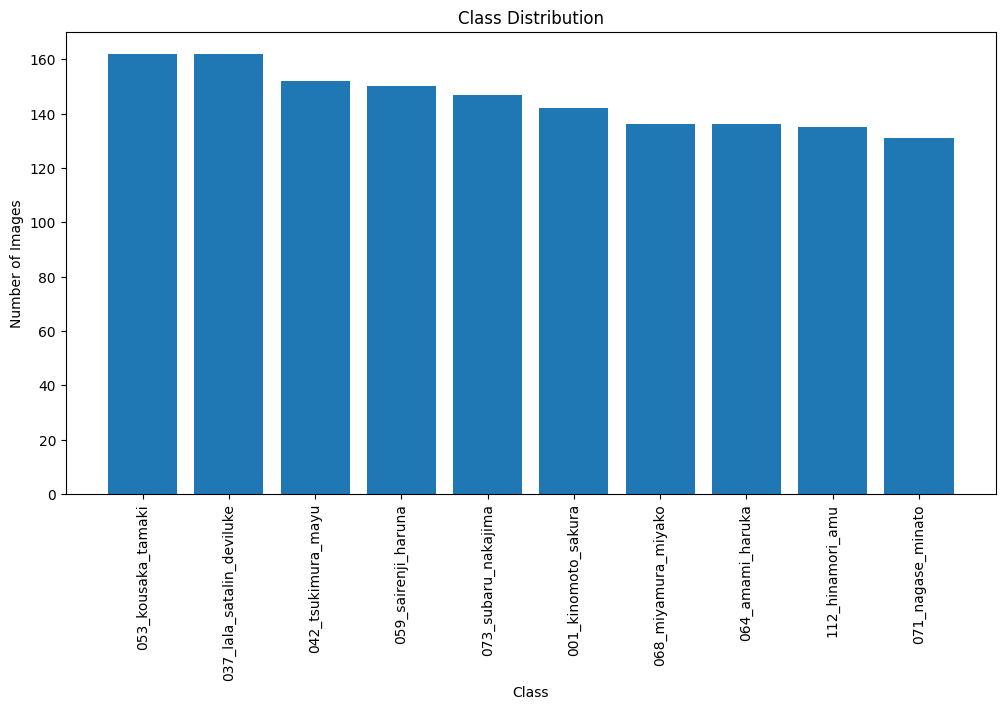

Mean images/class: 84.21965317919076
Median images/class: 81.0
Std deviation: 27.10591340906041
Classes with fewer than 50% of avg samples:
                       Class  Count
13          175_saotome_alto     41
45        084_okazaki_tomoya     33
55          181_allen_walker     40
57      188_aika_granzchesta     38
74                186_nanael     42
97   134_nunnally_lamperouge     38
120   078_black_rock_shooter     41
131            998_ito_nobue     39


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls)))
                for cls in os.listdir(data_dir)
                if os.path.isdir(os.path.join(data_dir, cls))}


df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])

df_top_10 = df.sort_values("Count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(df_top_10["Class"], df_top_10["Count"])
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()

print("Mean images/class:", df["Count"].mean())
print("Median images/class:", df["Count"].median())
print("Std deviation:", df["Count"].std())

threshold = 0.5 * df["Count"].mean()
imbalanced = df[df["Count"] < threshold]
print("Classes with fewer than 50% of avg samples:")
print(imbalanced)

Format: PNG
Size: (160, 156)
Mode: RGB


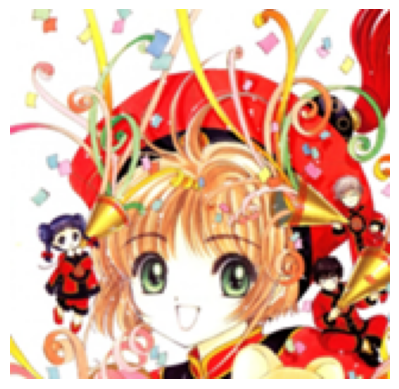

In [50]:
from PIL import Image

path = "/kaggle/input/anime-character-classification-2/moeimouto-faces/001_kinomoto_sakura/face_156_313_74.png"
img = Image.open(path)

print("Format:", img.format)
print("Size:", img.size)
print("Mode:", img.mode)

plt.imshow(img)
plt.axis("off")
plt.show()

# III Size of the image 

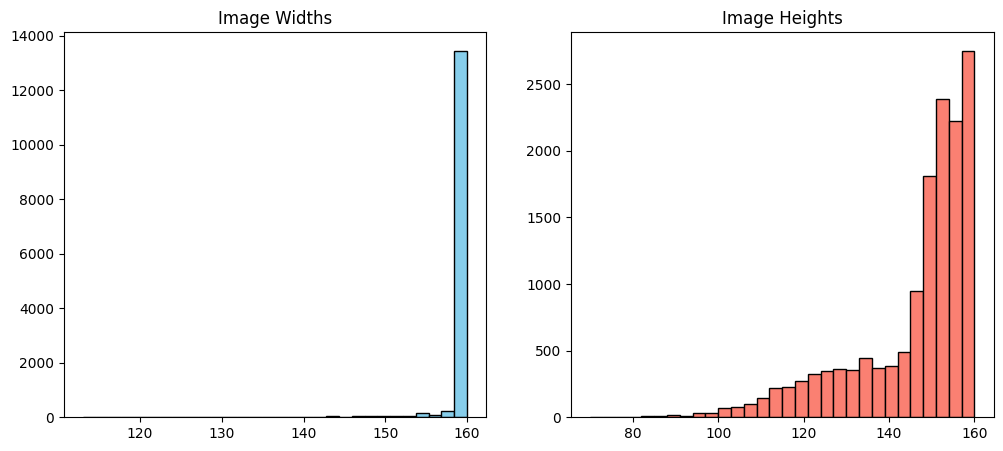

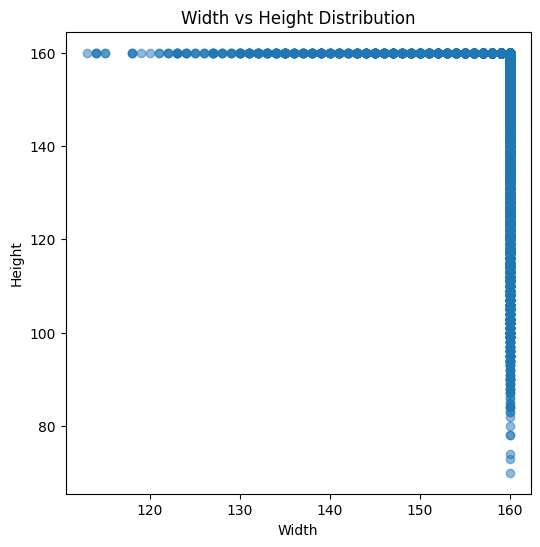

Total images checked: 14397
Corrupted images found: 0


In [51]:
data_dir = "/kaggle/input/anime-character-classification-2/moeimouto-faces"
widths, heights, corrupted = [], [], []

for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(".png"):
            filepath = os.path.join(root, file)
            try:
                with Image.open(filepath) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
            except Exception as e:
                corrupted.append(filepath)
# Histogram of widths and heights
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=30, color="skyblue", edgecolor="black")
plt.title("Image Widths")

plt.subplot(1,2,2)
plt.hist(heights, bins=30, color="salmon", edgecolor="black")
plt.title("Image Heights")

plt.show()

# Scatter plot width vs height
plt.figure(figsize=(6,6))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Width vs Height Distribution")
plt.show()

print(f"Total images checked: {len(widths)}")
print(f"Corrupted images found: {len(corrupted)}")

All the image have a size of 160x160

# IV Random sample of 5 class in the dataset 

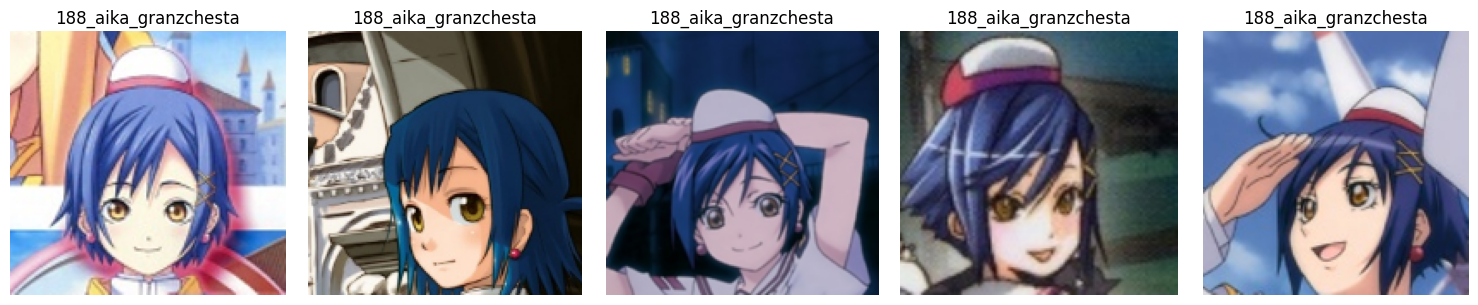

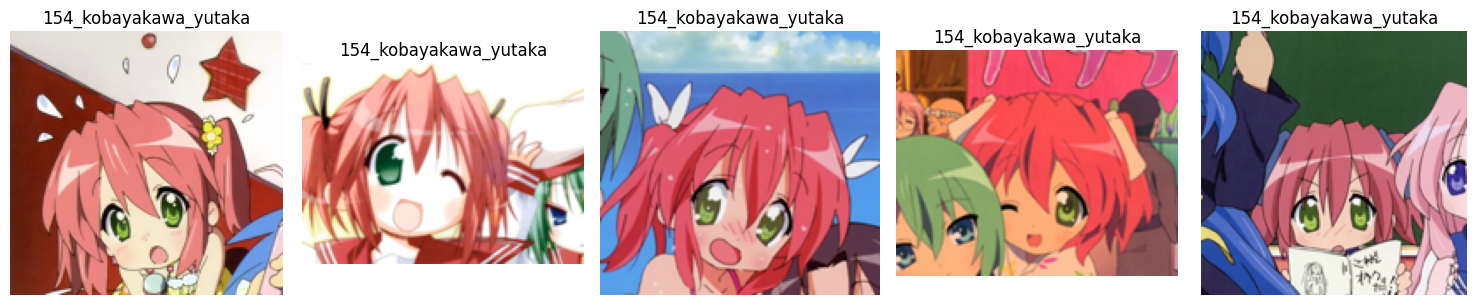

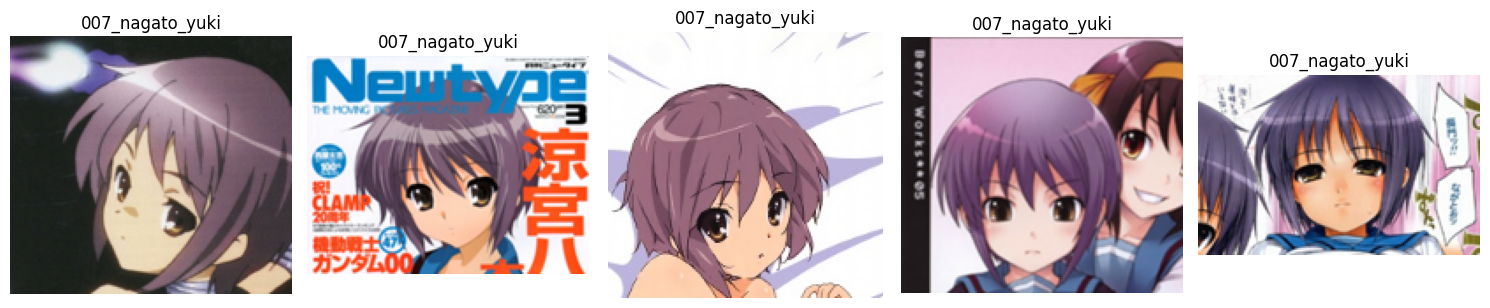

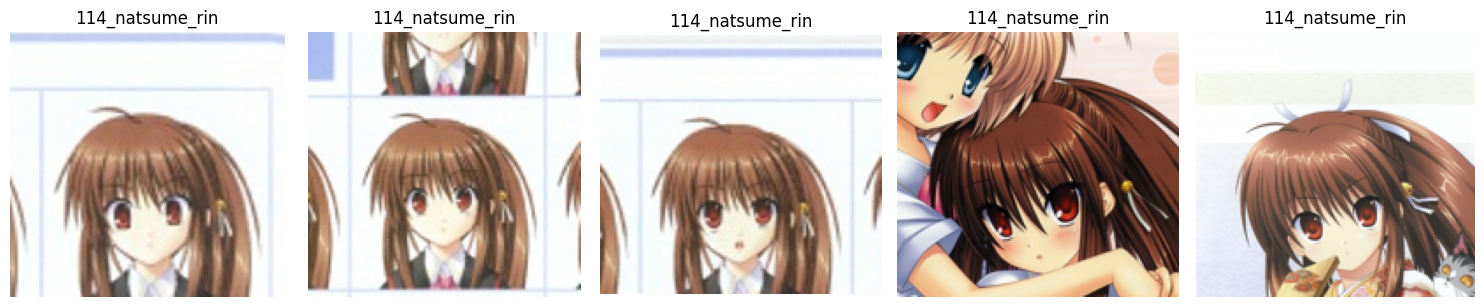

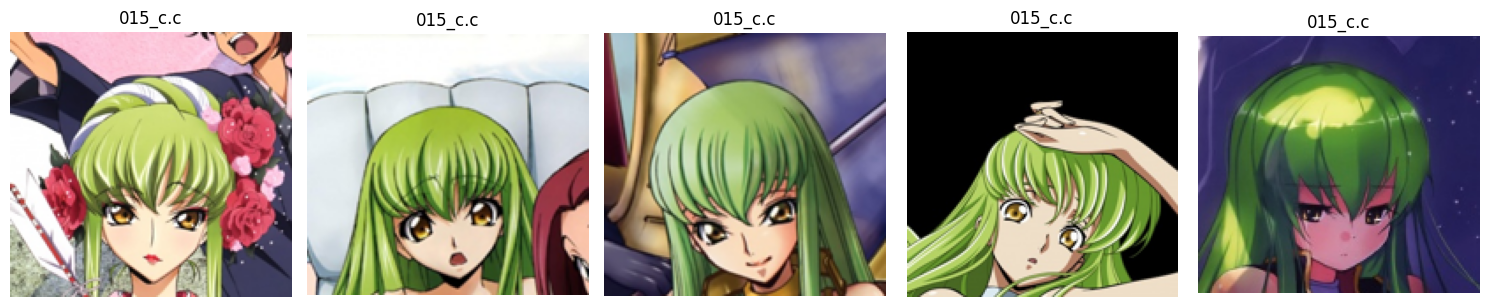

In [62]:
import random
samples_per_class = 5
num_classes_to_sample = 5

all_classes = [cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))]

sampled_classes = random.sample(all_classes, min(num_classes_to_sample, len(all_classes)))

for cls in sampled_classes:
    class_folder = os.path.join(dataset_path, cls)
    images = [f for f in os.listdir(class_folder) if f.lower().endswith(".png")]
    
    selected = random.sample(images, min(samples_per_class, len(images)))
    
    plt.figure(figsize=(15,3))
    for i, img_name in enumerate(selected):
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path)
        
        plt.subplot(1, samples_per_class, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls)
    
    plt.tight_layout()
    plt.show()

- The image data in the this dataset contain only the face of the character.
- Need an face cropping system for the user input to boost the model efficiency 

# V. Aspect ration distribution

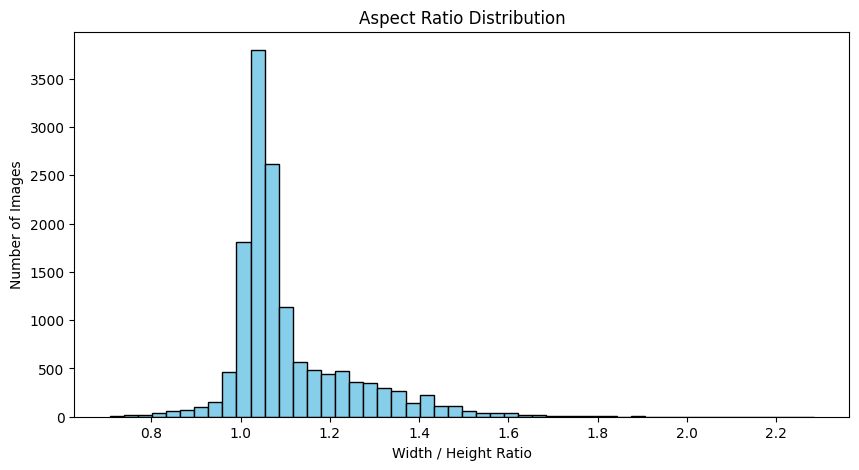

Landscape: 4517
Portrait: 213
Square: 9667


In [63]:
import os
from PIL import Image
import matplotlib.pyplot as plt

aspect_ratios = []

portrait_count = 0
landscape_count = 0
square_count = 0

for cls in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, cls)
    if not os.path.isdir(class_folder):
        continue
    
    for img_file in os.listdir(class_folder):
        if img_file.lower().endswith(".png"):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = Image.open(img_path)
                w, h = img.size
                ratio = w / h
                aspect_ratios.append(ratio)
                
                # Count orientations
                if ratio > 1.1:
                    landscape_count += 1
                elif ratio < 0.9:
                    portrait_count += 1
                else:
                    square_count += 1
                    
            except:
                pass

plt.figure(figsize=(10,5))
plt.hist(aspect_ratios, bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Width / Height Ratio")
plt.ylabel("Number of Images")
plt.title("Aspect Ratio Distribution")
plt.show()

print(f"Landscape: {landscape_count}")
print(f"Portrait: {portrait_count}")
print(f"Square: {square_count}")

# VI. Area outliers

In [65]:
import numpy as np
# Example: width and height arrays from previous analysis
widths = np.array(widths)
heights = np.array(heights)

# Area
areas = widths * heights
q1, q3 = np.percentile(areas, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_indices = np.where((areas < lower_bound) | (areas > upper_bound))[0]
print(f"Number of size outliers: {len(outlier_indices)}")


Number of size outliers: 720


# VII. Detect Visual Outliers Using Embeddings

2025-09-25 09:55:02.903987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758794103.228260      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758794103.313337      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loaded 8508 images from 173 classes.
Size-based outliers detected: 426


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


Computed embeddings shape: (8508, 512)


/tmp/ipykernel_36/585308749.py:95: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


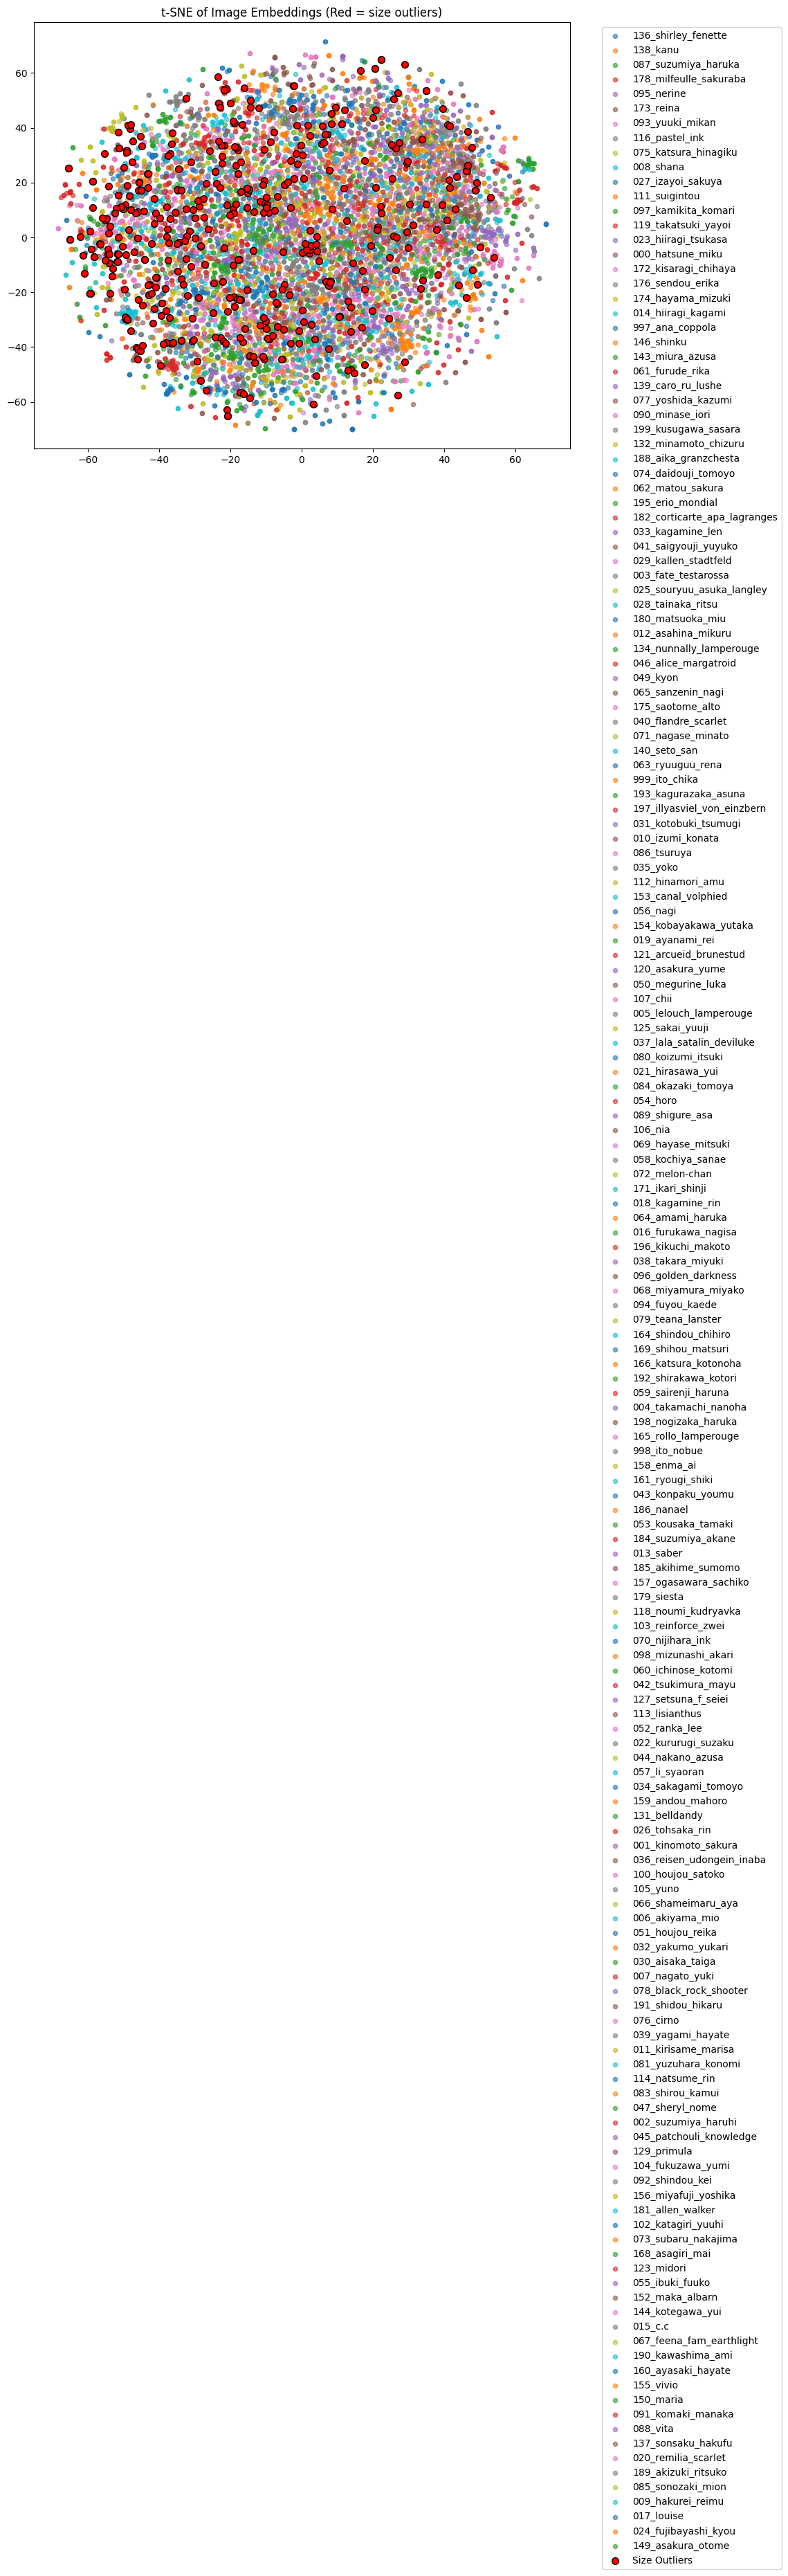

Embedding-based outliers detected: 511


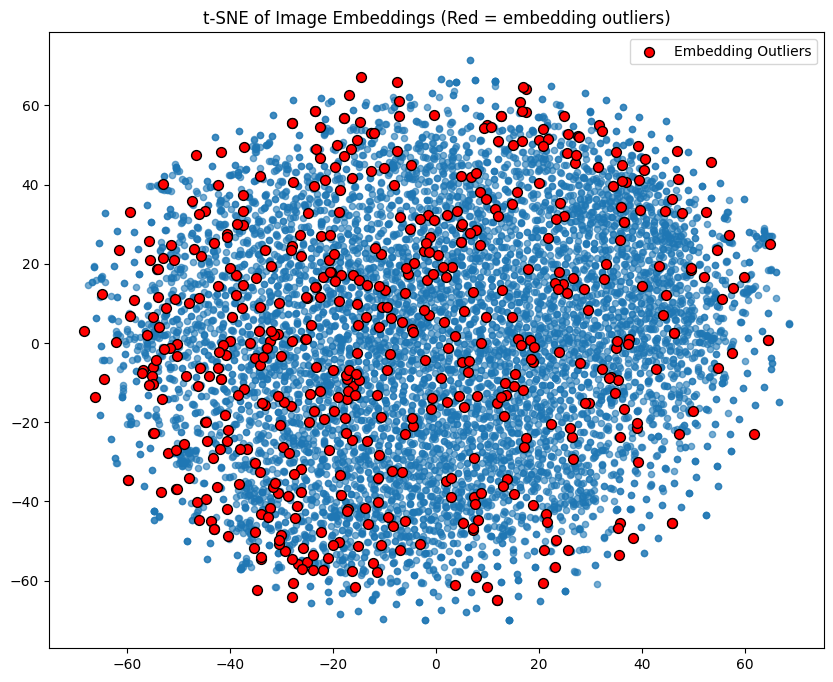

In [66]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms
import torch
from sklearn.manifold import TSNE
import umap

img_size = (224, 224)  
samples_per_class = 50  

# -----------------------------
# Helper: Load images
# -----------------------------
def load_images(data_dir, max_per_class=None):
    images = []
    labels = []
    for cls in os.listdir(data_dir):
        class_folder = os.path.join(data_dir, cls)
        if not os.path.isdir(class_folder):
            continue
        img_files = [f for f in os.listdir(class_folder) if f.lower().endswith(".png")]
        if max_per_class:
            img_files = img_files[:max_per_class]
        for img_file in img_files:
            img_path = os.path.join(class_folder, img_file)
            try:
                img = Image.open(img_path).convert("RGB")
                images.append(img)
                labels.append(cls)
            except:
                continue
    return images, labels

images, labels = load_images(data_dir, max_per_class=samples_per_class)
print(f"Loaded {len(images)} images from {len(set(labels))} classes.")

# -----------------------------
# Step 1: Size-based outliers
# -----------------------------
widths = np.array([img.width for img in images])
heights = np.array([img.height for img in images])
areas = widths * heights

# IQR method
q1, q3 = np.percentile(areas, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

size_outliers_idx = np.where((areas < lower_bound) | (areas > upper_bound))[0]
print(f"Size-based outliers detected: {len(size_outliers_idx)}")

# -----------------------------
# Step 2: Embedding-based outliers
# -----------------------------
# Pretrained ResNet18
resnet = models.resnet18(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove classifier
resnet.eval()

transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
])

embeddings = []
with torch.no_grad():
    for img in images:
        img_tensor = transform(img).unsqueeze(0)
        emb = resnet(img_tensor).squeeze().numpy()
        embeddings.append(emb)

embeddings = np.array(embeddings)
print(f"Computed embeddings shape: {embeddings.shape}")

# Dimensionality reduction
reducer = TSNE(n_components=2, random_state=42)
emb_2d = reducer.fit_transform(embeddings)

# -----------------------------
# Step 3: Plot t-SNE with outliers highlighted
# -----------------------------
plt.figure(figsize=(10,8))
for cls in set(labels):
    idx = [i for i, l in enumerate(labels) if l==cls]
    plt.scatter(emb_2d[idx,0], emb_2d[idx,1], label=cls, alpha=0.6, s=20)

# Highlight size outliers
plt.scatter(emb_2d[size_outliers_idx,0], emb_2d[size_outliers_idx,1],
            c='red', label='Size Outliers', edgecolors='black', s=50)
plt.title("t-SNE of Image Embeddings (Red = size outliers)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# Step 4: Optional - Detect extreme embedding outliers
# -----------------------------
# Distance from class center
from scipy.spatial.distance import cdist
embedding_outliers = []

for cls in set(labels):
    idx = [i for i, l in enumerate(labels) if l==cls]
    class_emb = embeddings[idx]
    class_center = class_emb.mean(axis=0)
    dists = cdist(class_emb, [class_center])
    threshold = np.percentile(dists, 95)  # top 5% farthest
    outlier_idx = [idx[i] for i, d in enumerate(dists) if d > threshold]
    embedding_outliers.extend(outlier_idx)

print(f"Embedding-based outliers detected: {len(embedding_outliers)}")

# Highlight embedding outliers on t-SNE
plt.figure(figsize=(10,8))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.6, s=20)
plt.scatter(emb_2d[embedding_outliers,0], emb_2d[embedding_outliers,1],
            c='red', label='Embedding Outliers', edgecolors='black', s=50)
plt.title("t-SNE of Image Embeddings (Red = embedding outliers)")
plt.legend()
plt.show()

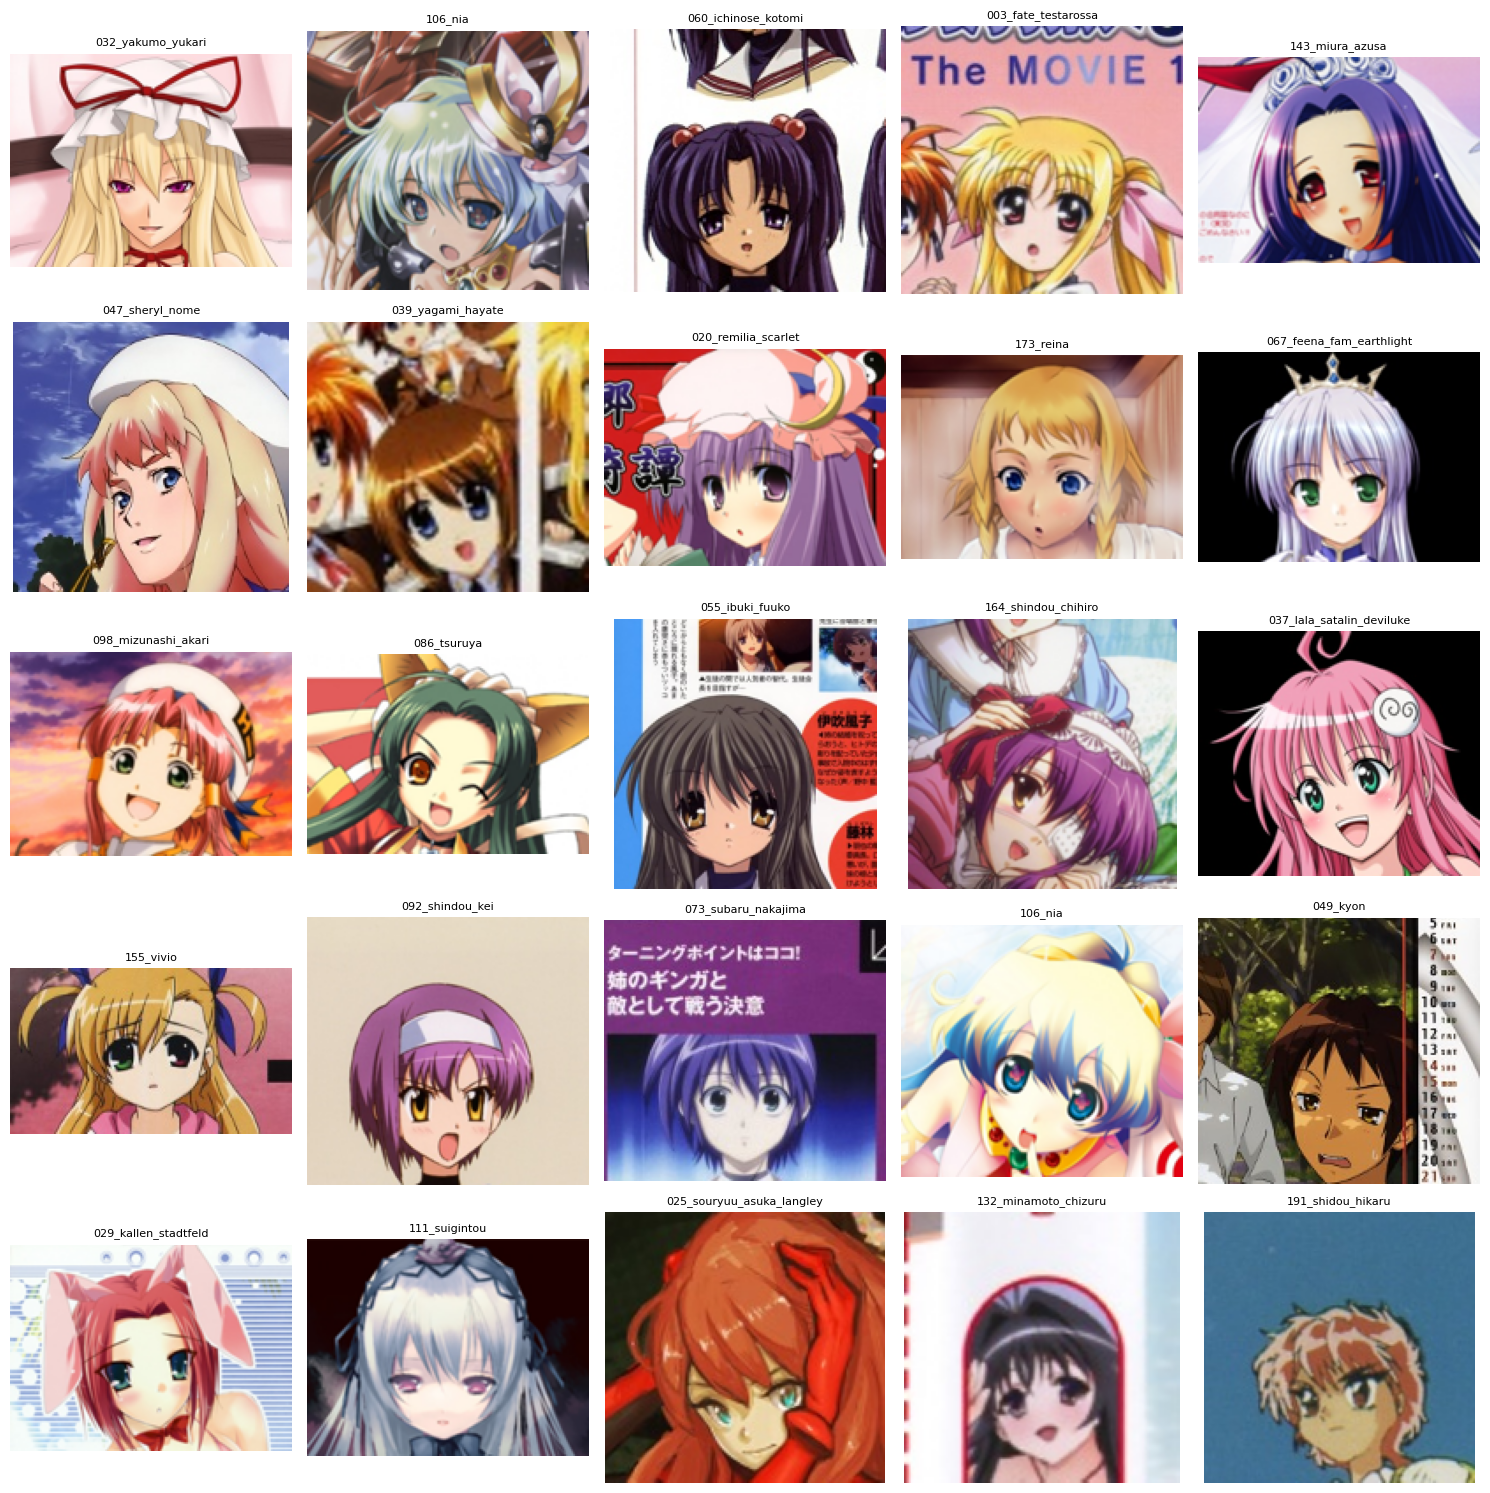

In [67]:
num_samples = 25  
cols = 5         

sample_indices = random.sample(embedding_outliers, min(num_samples, len(embedding_outliers)))

rows = (len(sample_indices) + cols - 1) // cols
plt.figure(figsize=(cols*3, rows*3))

for i, idx in enumerate(sample_indices):
    img = images[idx]
    label = labels[idx]
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label, fontsize=8)

plt.tight_layout()
plt.show()

- The outslier is still in the correct class